<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Notas de clase:

Capitulo 2:

2.0.2 Máximos,

2.0.5 Espiral de arquímedes.

Capítulo 4:

Ejercicios derivación: 1,2,5,6
"""

In [ ]:
import numpy as np
import sys

**MÁXIMOS**

Descargue los datos de:
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt.
Diseñe  un  algoritmopara encontrar todos los máximos locales en esta serie de dato.

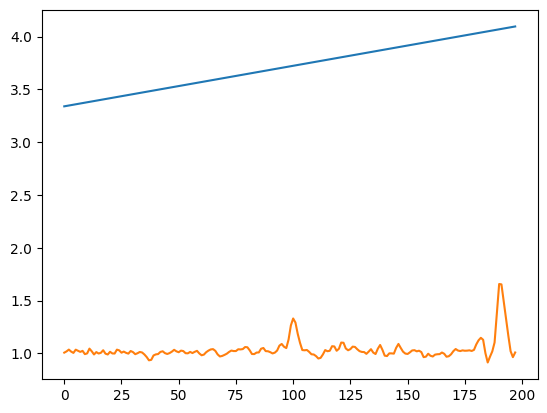

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

estrella = np.loadtxt("EstrellaEspectro.txt")

plt.plot(estrella)


In [ ]:
maximos_locales = []
for i in range(1,len(estrella)-1):
  if (estrella[i,1] > estrella[i-1,1]) and (estrella[i,1] > estrella[i+1,1]):
      maximos_locales.append(estrella[i])
print(maximos_locales)

[array([3.34767668, 1.036267  ]), array([3.35919183, 1.03554   ]), array([3.37070698, 1.024369  ]), array([3.38222214, 1.045406  ]), array([3.39373729, 1.012803  ]), array([3.40525244, 1.030349  ]), array([3.41676759, 1.015571  ]), array([3.42828274, 1.035833  ]), array([3.43979789, 1.017348  ]), array([3.45131305, 1.02287   ]), array([3.46666658, 1.013802  ]), array([3.50505042, 1.020233  ]), array([3.52424234, 1.034254  ]), array([3.53575749, 1.02666   ]), array([3.55111102, 1.014296  ]), array([3.56262618, 1.024395  ]), array([3.58949486, 1.040716  ]), array([3.62020193, 1.027063  ]), array([3.63171708, 1.039316  ]), array([3.64323224, 1.060527  ]), array([3.67393931, 1.051431  ]), array([3.70464638, 1.089617  ]), array([3.7238383, 1.330906 ]), array([3.7468686, 1.032746 ]), array([3.77757567, 1.031765  ]), array([3.78909082, 1.068328  ]), array([3.80444436, 1.102898  ]), array([3.82363628, 1.064289  ]), array([3.85434335, 1.040364  ]), array([3.86969688, 1.079907  ]), array([3.8850

**ESPIRAL DE ARQUÍMEDES**

(a)  La  espiral  de  arquímedes  está  descrita  por  la  siguiente  ecuación  en  coordenadaspolares:

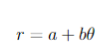

Haga a= 0 y b= 1 y calcule las posiciones entreθ∈[0.,2π].

(b)  Haga el cambio de coordenadas y gráfique la espira.

In [ ]:
import numpy as np

theta = np.linspace(0,2*np.pi,50)

a = 0
b = 1

r = a + b*theta





In [ ]:
print(r)

[0.         0.01574733 0.03149466 0.04724199 0.06298933 0.07873666
 0.09448399 0.11023132 0.12597865 0.14172598 0.15747332 0.17322065
 0.18896798 0.20471531 0.22046264 0.23620997 0.25195731 0.26770464
 0.28345197 0.2991993  0.31494663 0.33069396 0.3464413  0.36218863
 0.37793596 0.39368329 0.40943062 0.42517795 0.44092528 0.45667262
 0.47241995 0.48816728 0.50391461 0.51966194 0.53540927 0.55115661
 0.56690394 0.58265127 0.5983986  0.61414593 0.62989326 0.6456406
 0.66138793 0.67713526 0.69288259 0.70862992 0.72437725 0.74012459
 0.75587192 0.77161925 0.78736658 0.80311391 0.81886124 0.83460857
 0.85035591 0.86610324 0.88185057 0.8975979  0.91334523 0.92909256
 0.9448399  0.96058723 0.97633456 0.99208189 1.00782922 1.02357655
 1.03932389 1.05507122 1.07081855 1.08656588 1.10231321 1.11806054
 1.13380787 1.14955521 1.16530254 1.18104987 1.1967972  1.21254453
 1.22829186 1.2440392  1.25978653 1.27553386 1.29128119 1.30702852
 1.32277585 1.33852319 1.35427052 1.37001785 1.38576518 1.40151

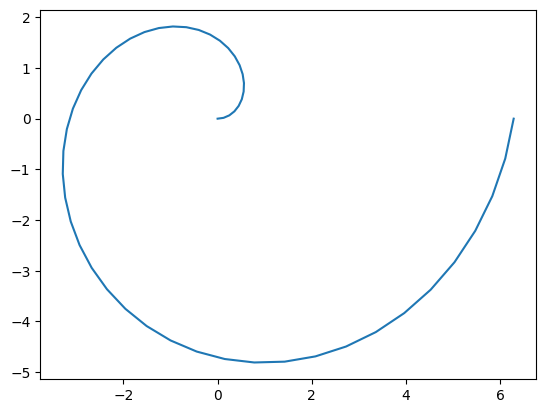

In [ ]:
import matplotlib.pyplot as plt
#cambio de coordenadas
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y)



**DERIVACIÓN **


Usando la definición de derivada central (con h= 0.05) estime la derivada de la función:
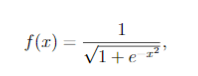

a)  En el intervalo −10≤x≤10.

b)  Para el intervalo anterior, estimar el error en cada punto nodal


In [4]:
import numpy as np
x = np.linspace(-10,10,50)
def funcion(x):
  return 1/np.sqrt(1+np.e**(-x**2))

def Derivative(f,variable,h=0.05):
  return (f(variable+h)-f(variable-h))/(2*h)




In [9]:
X = Derivative(funcion,x,0.05)

 Calcular el campo de velocidades cerca de la superficie de un cilindro de radioR= 2cm.Para esta tarea realizar los siguientes pasos:

 a)  Definir  una  discretización en  los  ejes x e y,  donde la  región  es: A∈[−4,4]  con 25 puntos en cada eje.

 b)  Definir la función potencial del flujo dada por:

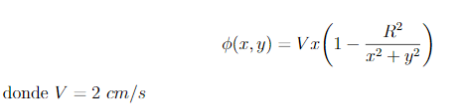

c)  Calcule  y  guarde  adecuadamente  el  campo  de  velocidades  usando  la  definici ́on  dederivada parcial central como:

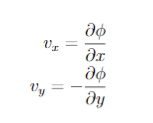

use h= 0.001.  Note que al interior del cilindro el campo de velocidades debe ser iguala cero.

d)  Dibuje el campo de velocidades usando el m ́etodo:ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j]).


In [ ]:
import numpy as np
x = np.linspace(-4,4,25)
y = np.linspace(-4,4,25)
x,y = np.meshgrid(x,y)

def potencial_de_flujo(x,y,R=2,V=2):
    distancia = (x**2 + y**2)
    potencial = np.where(distancia > R**2, V*x*(1-((R**2)/distancia)),0)
    return potencial


In [ ]:
def velocidades(x,y,h):
  Vx = np.zeros((len(x)))
  Vy = np.zeros((len(y)))
  for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        if x[i]**2 + y[j]**2 > 2**2:
            Vx[i, j] = (potencial_flujo(x+h) - potencial_flujo(x-h)) / (2 * h)
            Vy[i, j] = (potencial_flujo(y+h) - potencial_flujo(y-h)) / (2 * h)
        else:
            pass
            Vx[i, j] = 0
            Vy[i, j] = 0

  return Vx, Vy


TypeError: quiver() takes from 2 to 5 positional arguments but 1 were given

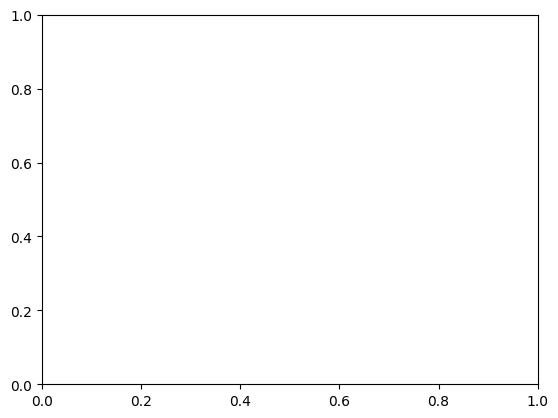

In [ ]:
import matplotlib.pyplot as plt
plt.quiver((x,y,Vx,Vy))
